In [94]:
import matplotlib.pyplot as plt
import os
import json
import time
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
from pprint import pprint
%matplotlib inline

In [95]:
source_path = '../fetch/data2/'

In [101]:
ms = 1474575002
g = datetime.fromtimestamp(ms)
# s = datetime.strftime('%Y-%m-%d %H:%M:%S', g)
print g.hour
print g

16
2016-09-22 16:10:02


In [102]:
def getAdmin2(tweet):
    #If the "admin_info" key is empty for that tweet, this will skip the loop and return None
    for x in xrange(len(tweet["admin_info"])):
        if u'ID_2' in tweet["admin_info"][x].keys():
            return tweet["admin_info"][x]["ID_2"]
        else:
            continue
    return None

In [103]:
def readAdmins(inpath):
    start = time.clock()
    with open(inpath, "rt") as inFile:
        line = inFile.readline()
        for x in xrange(100):
            j = json.loads(line)
            a2 = getAdmin2(j)
            if a2:
                
            line = inFile.readline()
    print time.clock() - start
    return

readAdmins(source_path + os.listdir(source_path)[0])

IndentationError: expected an indented block (<ipython-input-103-0f45c7b03230>, line 10)

In [104]:
def readTimes(inpath):
    start = time.clock()
    with open(inpath, "rt") as inFile:
        line = inFile.readline()
        d = dict()
        while line:
            j = json.loads(line)
            tm2 = datetime.strptime(str(datetime.utcfromtimestamp(int(str(j["local_time"])[:-3]))),\
                                    "%Y-%m-%d %H:%M:%S")
            bucket = datetime.strftime(tm2, "%Y-%m-%d-%H")
            if bucket in d:
                d[bucket] += 1
            else:
                d[bucket] = 1
            line = inFile.readline()        
    return d
    
s = (readTimes(source_path + os.listdir(source_path)[20]))
pprint((s))

{'2016-09-22-13': 1,
 '2016-09-22-20': 2,
 '2016-10-25-13': 45,
 '2016-10-25-14': 389,
 '2016-10-25-15': 455,
 '2016-10-25-16': 343,
 '2016-10-25-17': 5603,
 '2016-10-25-18': 6209,
 '2016-10-25-19': 4840,
 '2016-10-25-20': 2311,
 '2016-10-25-21': 7893,
 '2016-10-25-22': 44397,
 '2016-10-25-23': 48188,
 '2016-10-26-00': 34508,
 '2016-10-26-01': 14913,
 '2016-10-26-02': 7410,
 '2016-10-26-03': 4117,
 '2016-10-26-04': 2838,
 '2016-10-26-05': 3653,
 '2016-10-26-06': 7641,
 '2016-10-26-07': 9403,
 '2016-10-26-08': 10322,
 '2016-10-26-09': 11416,
 '2016-10-26-10': 12967,
 '2016-10-26-11': 14936,
 '2016-10-26-12': 17297,
 '2016-10-26-13': 16890,
 '2016-10-26-14': 13621,
 '2016-10-26-15': 5846,
 '2016-10-26-16': 191,
 '2016-10-26-17': 133,
 '2016-10-26-18': 92,
 '2016-10-26-19': 81,
 '2016-10-26-20': 48,
 '2016-10-26-21': 21,
 '2016-10-26-22': 19,
 '2016-10-26-23': 11,
 '2016-10-27-00': 27,
 '2016-10-27-01': 30,
 '2016-10-27-02': 25,
 '2016-10-27-03': 12,
 '2016-10-27-04': 8,
 '2016-10-27-05':

In [105]:
def sortedKeys(dct):
    dates = [datetime.datetime.strptime(ts, "%Y-%m-%d-%H") for ts in dct.keys()]
    dates.sort()
    sorted_dates = [datetime.datetime.strftime(ts, "%Y-%m-%d-%H") for ts in dates]
    return sorted_dates

# for i in sortedKeys(s):
#     print s[i]

date_str = datetime.datetime.strftime(datetime.datetime.utcfromtimestamp(12341234123), "%Y-%m-%d-%H")
date_date = datetime.datetime.strptime(str(datetime.datetime.utcfromtimestamp(12341234123)), "%Y-%m-%d %H:%M:%S")
# help(date_date)
# print help(date_date)

AttributeError: type object 'datetime.datetime' has no attribute 'datetime'

In [ ]:
times2 = [2623, 1271, 526, 316, 391, 1165, 1581, 2081, 2779, 3256, 3530, 4015, 4149, 3635, 3378, 3533, 3950, 4806, 5257, 5919, 7691, 7743, 7178, 5549]
times= [7998, 8173, 5048, 2857, 1454, 683, 391, 425, 1165, 1686, 2083, 2816, 3178, 3635, 4274, 4218, 3873, 3727, 3524, 4005, 4657, 5072, 5490, 6549]

In [ ]:
plt.bar(range(24), times2)

In [ ]:
from itertools import chain
print list(chain(range(17,24),range(17)))
print times[17:]+times[:17]

In [ ]:
[[0]*24]*2

In [108]:
big = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 25, 1074, 4319, 3919, 3626, 3803, 4352, 5305, 5807, 6119, 0, 0, 0], [5156, 2793, 1458, 676, 397, 436, 1141, 1591, 2172, 2736, 3213, 3481, 3929, 4210, 3692, 3526, 3586, 4073, 4151, 4351, 4689, 6782, 7476, 7144], [4000, 2716, 1658, 954, 614, 488, 573, 993, 1649, 2245, 3332, 3828, 4262, 4517, 3565, 3563, 3529, 4064, 4308, 4566, 4139, 4687, 5003, 4778], [4195, 3208, 2014, 1192, 910, 515, 431, 564, 931, 1706, 2721, 3654, 4393, 4246, 4153, 3971, 4299, 5602, 5427, 5483, 5958, 4334, 4501, 4310], [236, 125, 94, 31, 10, 6, 22, 62, 1003, 2701, 2951, 3628, 4099, 4166, 3744, 3558, 3367, 4057, 5165, 5240, 5684, 4, 186, 275], [166, 79, 52, 40, 10, 9, 21, 43, 80, 116, 258, 276, 154, 156, 169, 223, 164, 179, 186, 338, 4601, 301, 140, 152], [4409, 2389, 1094, 482, 347, 390, 1123, 1649, 2039, 2621, 3309, 4922, 4471, 4513, 3480, 3153, 3342, 3987, 4492, 4984, 5475, 5860, 6577, 6244], [4982, 2836, 1385, 629, 385, 433, 1183, 1694, 2089, 2864, 3206, 3663, 4287, 4252, 3831, 3693, 3579, 3957, 4707, 5069, 5500, 6632, 8045, 8080], [431, 158, 117, 41, 18, 5, 45, 1190, 2220, 2556, 3281, 3795, 4442, 4322, 3822, 3415, 3776, 3930, 4239, 4549, 4607, 372, 327, 425], [4231, 2867, 1505, 794, 508, 481, 498, 856, 1378, 2226, 3233, 3755, 4420, 3991, 3725, 3641, 3750, 4375, 4620, 4525, 4745, 4671, 4684, 4332], [5217, 3470, 2030, 1197, 850, 615, 450, 718, 1226, 2250, 3506, 4293, 4766, 4685, 4598, 4097, 4164, 5078, 6016, 6856, 6773, 4449, 4885, 5411], [4927, 2731, 1301, 584, 333, 365, 1077, 1506, 1916, 2859, 2899, 3329, 4033, 3906, 3569, 3269, 3343, 3917, 4581, 5524, 6873, 7492, 7333, 7031], [5549, 2623, 1271, 526, 316, 391, 1165, 1581, 2081, 2779, 3256, 3530, 4015, 4149, 3635, 3378, 3533, 3950, 4806, 5257, 5919, 7691, 7743, 7178], [5548, 2266, 1173, 623, 358, 363, 1080, 1790, 2036, 2712, 2988, 3257, 3774, 3847, 3794, 3393, 3702, 3927, 4415, 5034, 5527, 6778, 7341, 7497], [4912, 2493, 1111, 627, 382, 515, 1059, 1573, 1992, 2653, 2985, 3273, 3799, 3912, 3333, 3195, 3338, 3788, 4300, 4709, 5172, 6427, 7675, 7662], [4760, 2474, 1193, 714, 359, 393, 1095, 1525, 1953, 2539, 2932, 3378, 3919, 3971, 3720, 3112, 3108, 3763, 4154, 4198, 4322, 6519, 7422, 6477], [3933, 2600, 1580, 905, 595, 596, 569, 937, 1487, 2094, 2970, 3700, 4016, 3956, 3569, 3477, 3255, 3359, 3859, 3932, 3977, 4603, 4595, 5055], [3556, 2994, 1996, 1179, 773, 558, 640, 630, 1095, 1786, 2902, 3847, 4773, 4415, 4411, 4160, 3850, 4561, 4705, 4838, 5637, 1, 35, 943], [4842, 2740, 1212, 666, 383, 461, 1064, 1540, 1867, 2361, 2948, 3213, 3673, 3964, 3215, 3108, 3375, 3796, 4530, 5037, 5488, 6065, 7177, 6612], [4968, 2610, 1157, 515, 335, 423, 1038, 1483, 2036, 2592, 3039, 3540, 3860, 3803, 3706, 3464, 3607, 3519, 4092, 4853, 4745, 6160, 6803, 6379]]

In [109]:
bigger = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 25, 1074, 4319, 3919, 3626, 3803, 4352, 5305, 5807, 6119, 0, 0, 0],
          [5156, 2793, 1458, 676, 397, 436, 1141, 1591, 2172, 2736, 3213, 3481, 3929, 4210, 3692, 3526, 3586, 4073, 4151, 4351, 4689, 6782, 7476, 7144],
          [4000, 2716, 1658, 954, 614, 488, 573, 993, 1649, 2245, 3332, 3828, 4262, 4517, 3565, 3563, 3529, 4064, 4308, 4566, 4139, 4687, 5003, 4778],
          [4195, 3208, 2014, 1192, 910, 515, 431, 564, 931, 1706, 2721, 3654, 4393, 4246, 4153, 3971, 4299, 5602, 5427, 5483, 5958, 4334, 4501, 4310],
          [236, 125, 94, 31, 10, 6, 22, 62, 1003, 2701, 2951, 3628, 4099, 4166, 3744, 3558, 3367, 4057, 5165, 5240, 5684, 4, 186, 275],
          [166, 79, 52, 40, 10, 9, 21, 43, 80, 116, 258, 276, 154, 156, 169, 223, 164, 179, 186, 338, 4601, 301, 140, 152],
          [4409, 2389, 1094, 482, 347, 390, 1123, 1649, 2039, 2621, 3309, 4922, 4471, 4513, 3480, 3153, 3342, 3987, 4492, 4984, 5475, 5860, 6577, 6244],
          [4982, 2836, 1385, 629, 385, 433, 1183, 1694, 2089, 2864, 3206, 3663, 4287, 4252, 3831, 3693, 3579, 3957, 4707, 5069, 5500, 6632, 8045, 8080],
          [431, 158, 117, 41, 18, 5, 45, 1190, 2220, 2556, 3281, 3795, 4442, 4322, 3822, 3415, 3776, 3930, 4239, 4549, 4607, 372, 327, 425],
          [4231, 2867, 1505, 794, 508, 481, 498, 856, 1378, 2226, 3233, 3755, 4420, 3991, 3725, 3641, 3750, 4375, 4620, 4525, 4745, 4671, 4684, 4332],
          [5217, 3470, 2030, 1197, 850, 615, 450, 718, 1226, 2250, 3506, 4293, 4766, 4685, 4598, 4097, 4164, 5078, 6016, 6856, 6773, 4449, 4885, 5411],
          [4927, 2731, 1301, 584, 333, 365, 1077, 1506, 1916, 2859, 2899, 3329, 4033, 3906, 3569, 3269, 3343, 3917, 4581, 5524, 6873, 7492, 7333, 7031],
          [5549, 2623, 1271, 526, 316, 391, 1165, 1581, 2081, 2779, 3256, 3530, 4015, 4149, 3635, 3378, 3533, 3950, 4806, 5257, 5919, 7691, 7743, 7178],
          [5548, 2266, 1173, 623, 358, 363, 1080, 1790, 2036, 2712, 2988, 3257, 3774, 3847, 3794, 3393, 3702, 3927, 4415, 5034, 5527, 6778, 7341, 7497],
          [4912, 2493, 1111, 627, 382, 515, 1059, 1573, 1992, 2653, 2985, 3273, 3799, 3912, 3333, 3195, 3338, 3788, 4300, 4709, 5172, 6427, 7675, 7662],
          [4760, 2474, 1193, 714, 359, 393, 1095, 1525, 1953, 2539, 2932, 3378, 3919, 3971, 3720, 3112, 3108, 3763, 4154, 4198, 4322, 6519, 7422, 6477],
          [3933, 2600, 1580, 905, 595, 596, 569, 937, 1487, 2094, 2970, 3700, 4016, 3956, 3569, 3477, 3255, 3359, 3859, 3932, 3977, 4603, 4595, 5055],
          [3556, 2994, 1996, 1179, 773, 558, 640, 630, 1095, 1786, 2902, 3847, 4773, 4415, 4411, 4160, 3850, 4561, 4705, 4838, 5637, 1, 35, 943],
          [4842, 2740, 1212, 666, 383, 461, 1064, 1540, 1867, 2361, 2948, 3213, 3673, 3964, 3215, 3108, 3375, 3796, 4530, 5037, 5488, 6065, 7177, 6612],
          [4968, 2610, 1157, 515, 335, 423, 1038, 1483, 2036, 2592, 3039, 3540, 3860, 3803, 3706, 3464, 3607, 3519, 4092, 4853, 4745, 6160, 6803, 6379],
          [4355, 2864, 1623, 1147, 751, 482, 463, 685, 1220, 1914, 2819, 3757, 3977, 4129, 3618, 3766, 3568, 3442, 3807, 4465, 4675, 5011, 5383, 5350],
          [5377, 3291, 1775, 781, 444, 530, 1146, 1529, 1966, 2437, 2891, 3724, 4055, 4321, 3648, 3452, 3724, 4184, 4787, 4996, 6223, 5954, 6828, 7496],
          [5628, 3521, 1766, 826, 438, 436, 991, 1492, 2054, 2939, 3322, 4034, 4017, 4193, 3858, 3607, 3862, 3908, 4430, 4577, 4482, 6913, 8825, 8032],
          [4152, 3311, 2218, 1318, 719, 674, 560, 798, 1388, 2206, 3044, 3783, 4285, 4304, 3992, 3915, 3375, 3725, 3970, 4136, 4128, 4571, 4692, 4893],
          [4619, 4448, 3276, 2185, 1391, 868, 690, 667, 803, 1236, 2095, 3340, 4148, 4700, 4321, 4108, 4225, 4810, 6629, 5650, 5605, 8705, 915, 4425], 
          [6653, 4689, 2300, 1250, 842, 642, 1343, 1742, 1922, 2525, 2939, 3439, 4638, 4788, 4200, 3874, 3843, 4291, 4707, 5609, 5920, 7352, 6595, 7388],
          [5787, 3181, 1183, 668, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 21, 95, 1447, 7207, 7800],
          [0, 1, 18, 18, 19, 16, 17, 40, 103, 150, 232, 179, 261, 212, 181, 213, 167, 146, 211, 255, 390, 0, 0, 0],
          [169, 143, 97, 120, 6, 18, 9, 81, 97, 176, 184, 217, 220, 194, 172, 182, 201, 240, 232, 201, 331, 341, 224, 208],
          [264, 145, 55, 94, 332, 445, 983, 1693, 1974, 2498, 3018, 3649, 4153, 3915, 2023, 3002, 2628, 2691, 3382, 4500, 4483, 3977, 301, 305],
          [4387, 3128, 1936, 1041, 759, 596, 608, 839, 1302, 2163, 2863, 3495, 4065, 4146, 4070, 3300, 3266, 3484, 3640, 3659, 4100, 4152, 4860, 4927],
          [4249, 3199, 2278, 1528, 897, 547, 558, 588, 864, 1622, 2489, 3732, 4607, 4514, 4378, 4033, 4613, 5876, 6509, 5620, 5514, 6241, 4391, 4672],
          [7709, 3582, 1845, 973, 490, 384, 1013, 1524, 2126, 2515, 3210, 3742, 4221, 4471, 3881, 3432, 3708, 4223, 4723, 4951, 5781, 6907, 7765, 9434],
          [5857, 3258, 1604, 669, 513, 406, 995, 1708, 2054, 2683, 2923, 3379, 4369, 4799, 3778, 3652, 3589, 4311, 4838, 5374, 6009, 6970, 7793, 7720],
          [5827, 3105, 1645, 783, 454, 367, 1134, 1663, 2130, 2474, 3022, 3294, 4255, 4139, 3584, 3220, 3683, 4146, 4461, 4857, 5635, 6859, 7807, 7977],
          [5844, 2801, 1692, 764, 373, 518, 1055, 1610, 2275, 2741, 3180, 3486, 3895, 4238, 3624, 3579, 3773, 3726, 4700, 5466, 5515, 5705, 6895, 8176],
          [4857, 2734, 1450, 703, 386, 343, 1027, 1327, 2051, 2464, 3025, 3345, 3864, 3544, 357, 0, 0, 0, 0, 0, 9, 63, 854, 5406]]

In [110]:
import itertools
collated = [sum(x) for x in itertools.izip(*bigger[1:])]
print collated
print len(bigger)

print [x/(len(bigger)-1) for x in collated[1:]]

[151752, 91573, 50162, 27243, 16698, 14715, 26866, 39911, 55579, 77139, 97185, 116957, 134115, 135588, 117416, 110731, 112892, 127085, 143779, 153680, 168726, 170996, 179283, 190194]
37
[2543, 1393, 756, 463, 408, 746, 1108, 1543, 2142, 2699, 3248, 3725, 3766, 3261, 3075, 3135, 3530, 3993, 4268, 4686, 4749, 4980, 5283]


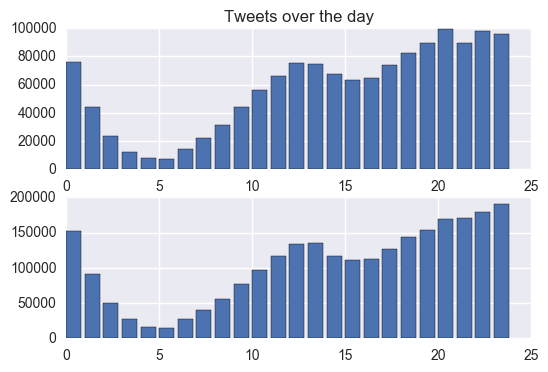

In [111]:
f, (a1, a2) = plt.subplots(2)
a1.bar(range(24), [sum(x) for x in itertools.izip(*big[1:])])
a2.bar(range(24), collated)
a1.set_title("Tweets over the day")

In [112]:
import copy
data_copy = copy.deepcopy(data)

total = data.sum(axis=1)
i = 0
for day in total:
    discard = day < max(total)/2.
    if discard:
        data_copy.iloc[i,:] = 0
    i += 1
qxyaz = data_copy.divide(total, axis= 'rows')

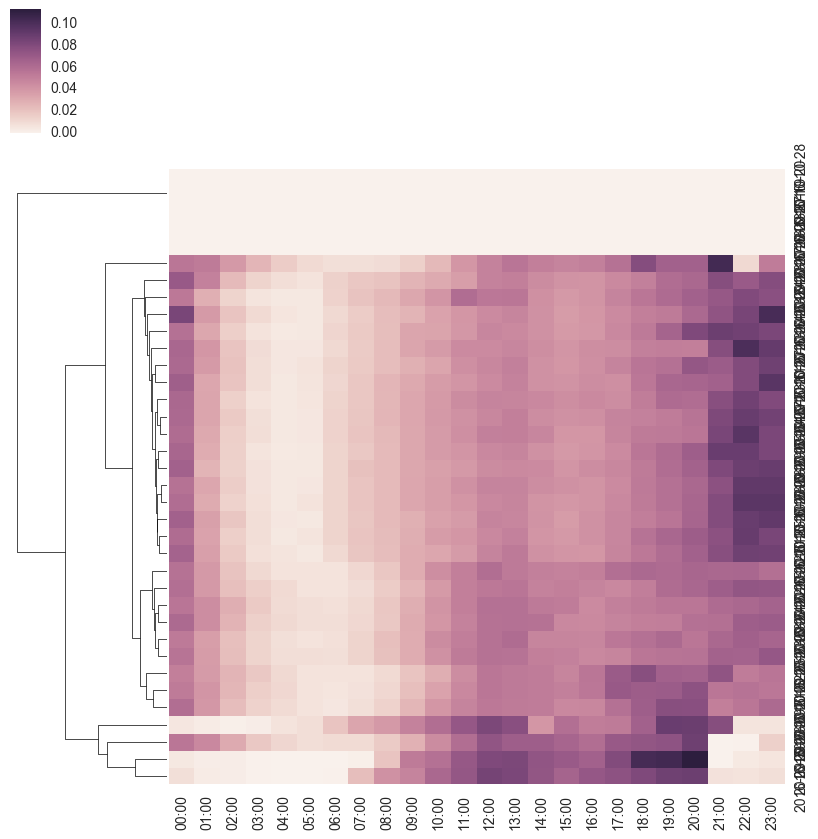

In [113]:
sns.clustermap(qxyaz, col_cluster = False)

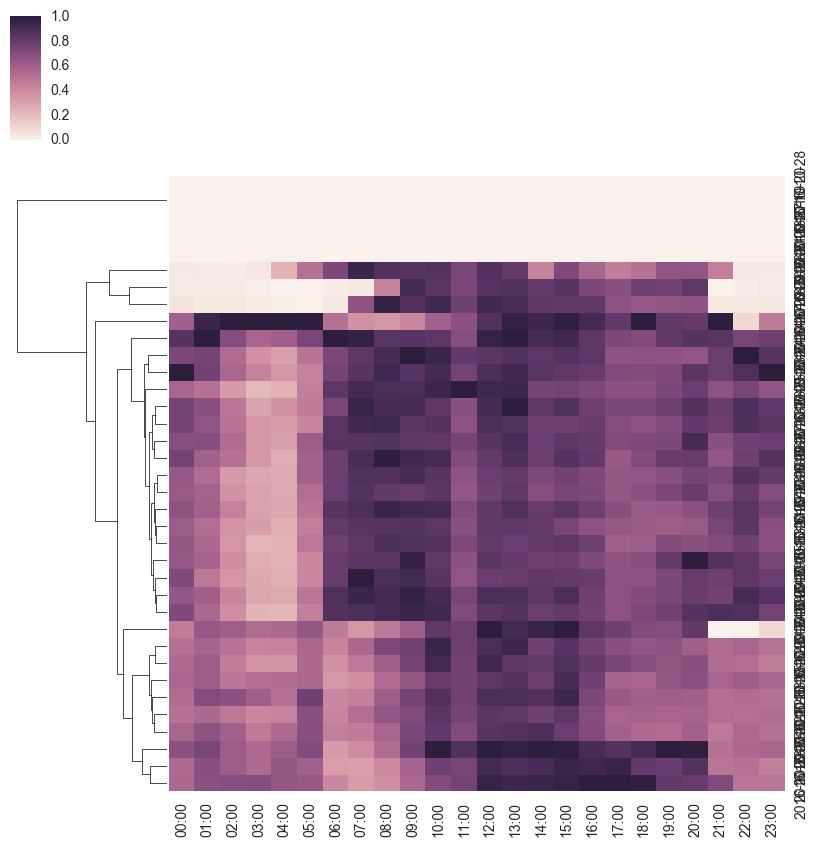

In [116]:
sns.clustermap(data_copy, col_cluster = False, standard_scale = 1)

AttributeError: 'Axes' object has no attribute 'show'

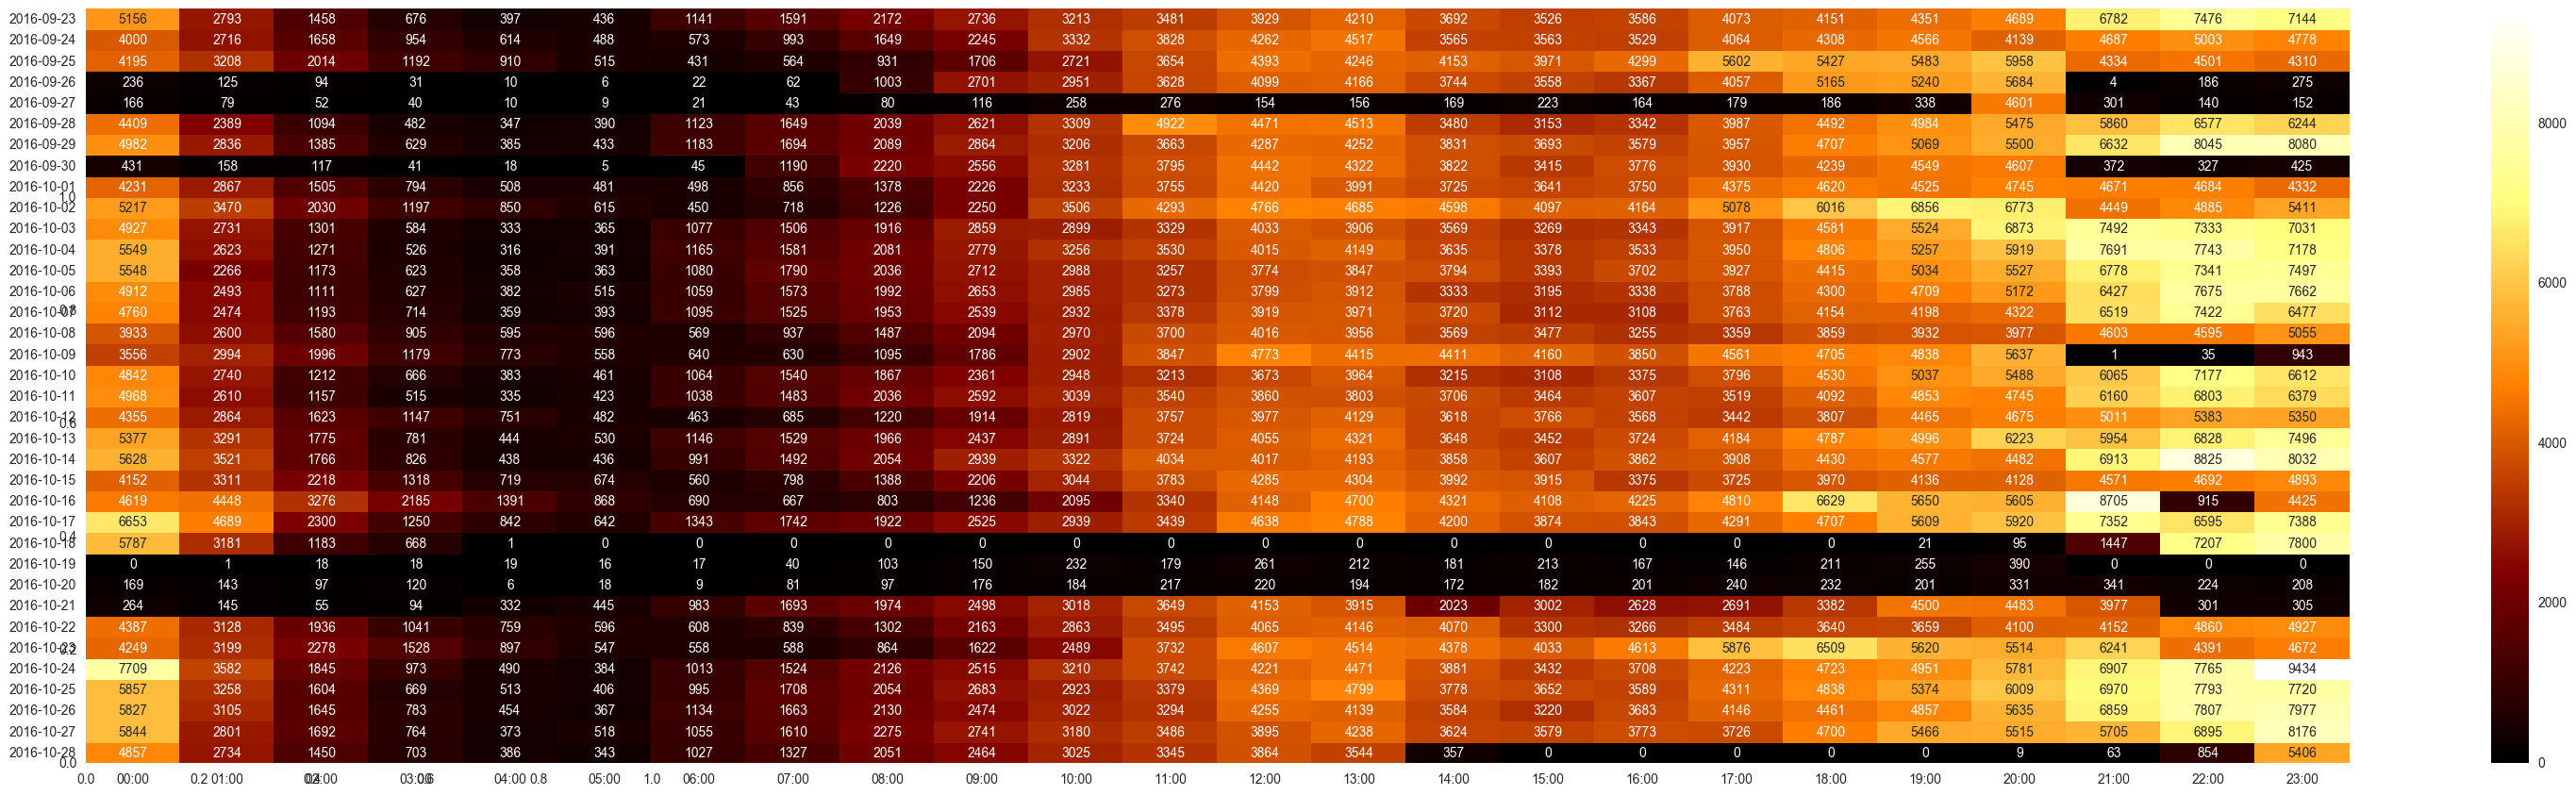

In [127]:
plt.close('all')
data = pd.DataFrame(bigger[1:]) #skip the first day with inconsistent data
(total) = (sum(x) for x in data)
xlabels = ["00:00", "01:00", "02:00", "03:00", "04:00", "05:00", "06:00", "07:00", "08:00", "09:00" ,"10:00", "11:00",
          "12:00", "13:00", "14:00", "15:00", "16:00" ,"17:00" ,"18:00" ,"19:00", "20:00", "21:00", "22:00", "23:00"]
ylabels = [str(x.date()) for x in pd.date_range(pd.to_datetime("09/23/2016", infer_datetime_format = True), periods = len(data)).tolist()]
# help(data)
data.columns = xlabels
data.index = ylabels

axes = plt.axes([0,0,1,1.5])
ax = sns.heatmap(data, cmap = plt.cm.afmhot, ax = plt.axes([0,0,5,2]), annot = True, fmt = "d")
sns.heatmap.

In [46]:
help(ax.pcolormesh)

Help on method pcolormesh in module matplotlib.axes._axes:

pcolormesh(ax, *args, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Plot a quadrilateral mesh.
    
    Call signatures::
    
      pcolormesh(C)
      pcolormesh(X, Y, C)
      pcolormesh(C, **kwargs)
    
    Create a pseudocolor plot of a 2-D array.
    
    pcolormesh is similar to :func:`~matplotlib.pyplot.pcolor`,
    but uses a different mechanism and returns a different
    object; pcolor returns a
    :class:`~matplotlib.collections.PolyCollection` but pcolormesh
    returns a
    :class:`~matplotlib.collections.QuadMesh`.  It is much faster,
    so it is almost always preferred for large arrays.
    
    *C* may be a masked array, but *X* and *Y* may not.  Masked
    array support is implemented via *cmap* and *norm*; in
    contrast, :func:`~matplotlib.pyplot.pcolor` simply does not
    draw quadrilaterals with masked colors or vertices.
    
    Keyword arguments:
    
      *cmap*: [ *Non